# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<scmdata.ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  At

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics on groups of timeseries. A number of pandas functions can be called including "sum", "mean" and "describe".

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : str or func
            The operation to perform.

            If a string is provided the equivalent pandas
            function is used. Additional information about the arguments for the pandas
            groupby functions can be found at <https://pandas.pydata.org/pandas-docs/
            stable/reference/groupby.html>`_.

            If a function is provided, will be applied to each group. The function must
            take a dataframe as it's first argument and return a DataFrame, Series or scalar.

            Note that quantile means the value of the data at a given point in the cumulative
            distribution of values at each point in the timeseries, for each timeseries
            once the groupby is applied. As a result

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.354281    0.869668    1.239678    2.066836    2.042366    2.991037  ...   49.149053   32.965568   57.771775   50.486199   58.335345   46.297672   48.613084
                        W/m^2 Radiative Forcing                      0.0    0.375346    0.932262    1.262631    2.168378    1.804857    2.622975  ...   41.006882   47.900902   42.432111   62.751199   32.417243   47.806089   57.819741
                        K     Surface Temperature                    0.0    0.597209    0.808254    1.546619    2.086203    2.448862    2.499090  ...   47.106705   57.508781   49.360306   34.826452   58.561305   43.218066   32.461413

[3 rows x 101 columns]

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.241677    0.846579    1.005587    1.956961    1.995873    2.559874  ...   45.325673   38.314933   60.953311   43.085529   56.868480   50.126469   38.789206
                        W/m^2 Radiative Forcing                      0.0    0.322892    0.983119    1.351197    1.823311    1.026685    2.262397  ...   39.700947   46.297007   34.769826   66.052740   16.674651   46.066097   59.459149
                        K     Surface Temperature                    0.0    0.709821    0.895949    1.629693    2.227228    2.306516    2.265101  ...   42.718807   69.988609   49.322212   26.747763   64.787780   35.218222   29.902473

[3 rows x 101 columns]

### Arbitrary functions

You are also able to run arbitrary functions for each group

In [8]:
# NBVAL_IGNORE_OUTPUT
def mean_and_invert(df, axis=0):
    # Take a mean across the group and then invert the result
    return -df.mean(axis=axis)


runs.process_over("run_id", operation=mean_and_invert)

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2        -0.0   -0.354281   -0.869668   -1.239678   -2.066836   -2.042366   -2.991037  ...  -49.149053  -32.965568  -57.771775  -50.486199  -58.335345  -46.297672  -48.613084
                        W/m^2 Radiative Forcing                     -0.0   -0.375346   -0.932262   -1.262631   -2.168378   -1.804857   -2.622975  ...  -41.006882  -47.900902  -42.432111  -62.751199  -32.417243  -47.806089  -57.819741
                        K     Surface Temperature                   -0.0   -0.597209   -0.808254   -1.546619   -2.086203   -2.448862   -2.499090  ...  -47.106705  -57.508781  -49.360306  -34.826452  -58.561305  -43.218066  -32.461413

[3 rows x 101 columns]

In [9]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", operation=mean_and_invert, axis=1)

model    region  run_id  scenario  unit   variable                      
example  World   0       ssp119    ppm    Atmospheric Concentrations|CO2   -24.506140
                 1       ssp119    ppm    Atmospheric Concentrations|CO2   -25.608613
                 2       ssp119    ppm    Atmospheric Concentrations|CO2   -24.599232
                 3       ssp119    ppm    Atmospheric Concentrations|CO2   -24.945832
                 4       ssp119    ppm    Atmospheric Concentrations|CO2   -24.999990
                 5       ssp119    ppm    Atmospheric Concentrations|CO2   -24.992123
                 6       ssp119    ppm    Atmospheric Concentrations|CO2   -20.344423
                 7       ssp119    ppm    Atmospheric Concentrations|CO2   -20.961825
                 8       ssp119    ppm    Atmospheric Concentrations|CO2   -21.846823
                 9       ssp119    ppm    Atmospheric Concentrations|CO2   -24.777298
                 0       ssp119    W/m^2  Radiative Forcing        

### Other quantiles

In [10]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(
    cols="run_id", operation="quantile", q=0.17
)
lower_likely_quantile

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                                                                                                            ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2         0.0    0.127939    0.359954    0.432362    0.756616    0.878266    1.556249  ...   24.419106    3.600798   21.769186   31.365570   42.453876   14.625063   28.381906
                        W/m^2 Radiative Forcing                      0.0    0.129712    0.165721    0.499388    1.077504    0.549703    1.090669  ...   15.282966   25.011773   24.903286   32.662461    6.878169   16.441111   30.161644
                        K     Surface Temperature                    0.0    0.245173    0.266754    0.425369    0.419744    1.237473    1.001059  ...   27.634526   21.891968   26.823929    3.537454   37.875025   11.418849   12.822457

[3 rows x 101 columns]

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [11]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :class:`pandas.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The op

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  2001-01-01  2002-01-01  2003-01-01  2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  2095-01-01  2096-01-01  2097-01-01  2098-01-01  2099-01-01  2100-01-01
model   region scenario unit  variable                       quantile                                                                                      ...                                                                                    
example World  ssp119   ppm   Atmospheric Concentrations|CO2 0.05             0.0    0.089965    0.218857    0.137155    0.551492    0.282383    1.123623  ...   18.769979    1.836587    9.177266   30.873218   29.928393   11.357536   14.021943
                        W/m^2 Radiative Forcing              0.05             0.0    0.111497    0.095329    0.417863    0.572393    0.331560    0.757745  ...    9.839978   10.235085   20.613288   22.211909    5.147724    2.598198    0.377008
                        K     Surface Temperature            0.05             0.0    0.069054    0.102253    0.362563    0.185189    0.803985    0.575248  ...   19.625363   17.983454    9.884554    1.459871   17.738243    6.684281    4.325411
                        ppm   Atmospheric Concentrations|CO2 0.17             0.0    0.127939    0.359954    0.432362    0.756616    0.878266    1.556249  ...   24.419106    3.600798   21.769186   31.365570   42.453876   14.625063   28.381906
                        W/m^2 Radiative Forcing              0.17             0.0    0.129712    0.165721    0.499388    1.077504    0.549703    1.090669  ...   15.282966   25.011773   24.903286   32.662461    6.878169   16.441111   30.161644
                        K     Surface Temperature            0.17             0.0    0.245173    0.266754    0.425369    0.419744    1.237473    1.001059  ...   27.634526   21.891968   26.823929    3.537454   37.875025   11.418849   12.822457
                        ppm   Atmospheric Concentrations|CO2 0.5              0.0    0.241677    0.846579    1.005587    1.956961    1.995873    2.559874  ...   45.325673   38.314933   60.953311   43.085529   56.868480   50.126469   38.789206
                        W/m^2 Radiative Forcing              0.5              0.0    0.322892    0.983119    1.351197    1.823311    1.026685    2.262397  ...   39.700947   46.297007   34.769826   66.052740   16.674651   46.066097   59.459149
                        K     Surface Temperature            0.5              0.0    0.709821    0.895949    1.629693    2.227228    2.306516    2.265101  ...   42.718807   69.988609   49.322212   26.747763   64.787780   35.218222   29.902473
                        ppm   Atmospheric Concentrations|CO2 0.83             0.0    0.623482    1.403896    2.117641    3.275971    3.329696    4.414713  ...   81.954320   56.640234   88.464083   72.133896   78.716924   71.523321   74.113671
                        W/m^2 Radiative Forcing              0.83             0.0    0.680703    1.650869    1.608128    3.529065    3.562694    4.037311  ...   67.570386   70.430355   66.778846   90.031315   74.557031   77.701124   86.965257
                        K     Surface Temperature            0.83             0.0    0.910864    1.229613    2.429451    3.679632    3.946585    4.450043  ...   69.693554   78.699977   69.544950   74.051353   85.402752   81.288751   44.013374
                        ppm   Atmospheric Concentrations|CO2 0.95             0.0    0.828894    1.733084    2.438272    3.720710    3.613267    5.289006  ...   84.764810   71.124326   94.060578   83.244100   86.649580   83.724687   91.650476
                        W/m^2 Radiative Forcing              0.95             0.0    0.742675    1.772564    2.247493    3.830996    4.574450    5.078809  ...   88.971418   82.963862   79.480160   93.951511   83.470132   87.471087   99.287489
                        K     Surface Temperature            0.95             0.0    0.972583    1.337969    2.6

### Plotting

#### Calculate quantiles within plotting function

We can use `plumeplot` directly to plot quantiles. This will calculate the quantiles as part of making the plot so if you're doing this lots it might be faster to pre-calculate the quantiles, then make the plot instead (see below)

Note that in this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f60824f8be0>])

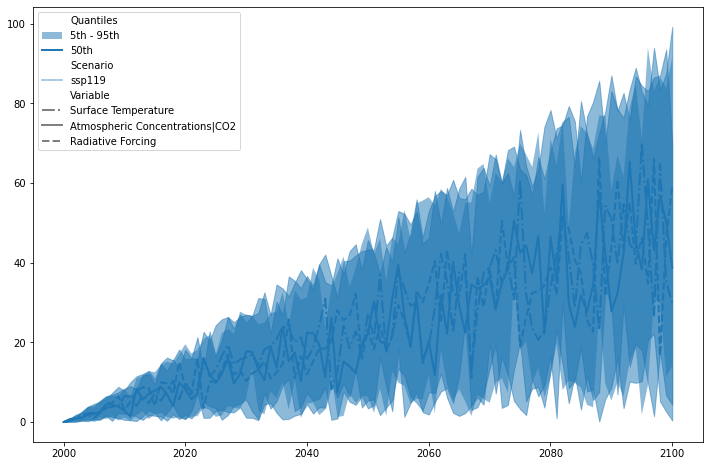

In [13]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(quantile_over="run_id")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f608243b100>])

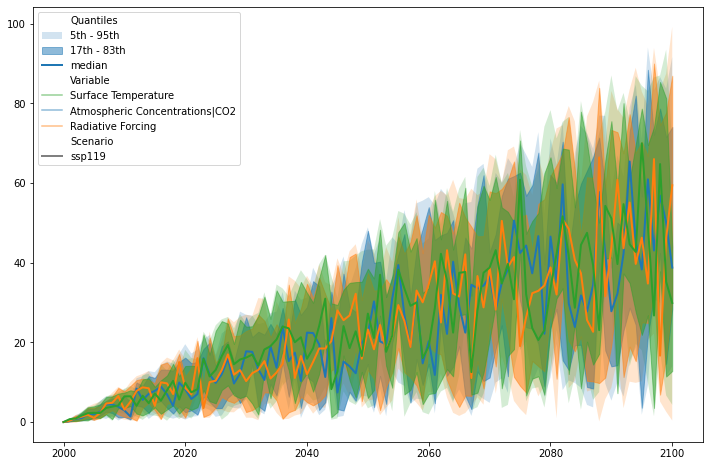

In [14]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(
    quantile_over="run_id",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)

#### Pre-calculated quantiles

Alternately, we can cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [15]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<scmdata.ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119      K             Surface Temperature
	3   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119      K             Surface Temperature
	6   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119      K             Surface Temperature
	9   example     0.83  World   ssp119    ppm  Atmospheric Concentrations|CO2
	10  example     0.83  World   ssp11

As discussed above, casting the output of `quantiles_over` to an `ScmRun` object helps avoid repeatedly calculating the quantiles.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f6082357460>])

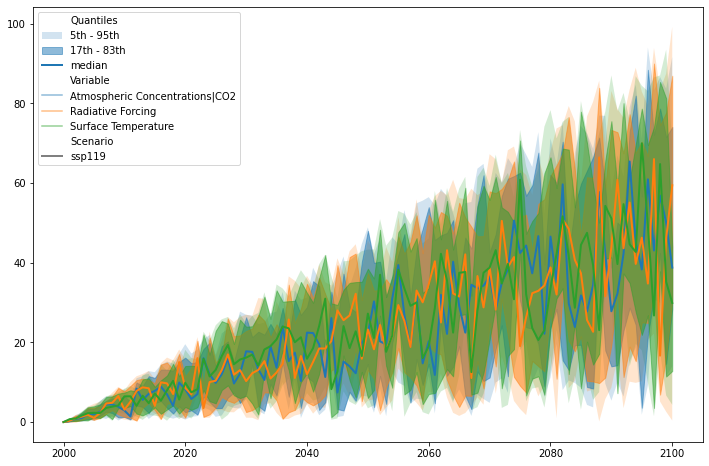

In [16]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    pre_calculated=True,
)

If we don't want a plume plot, we can always our standard lineplot method.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

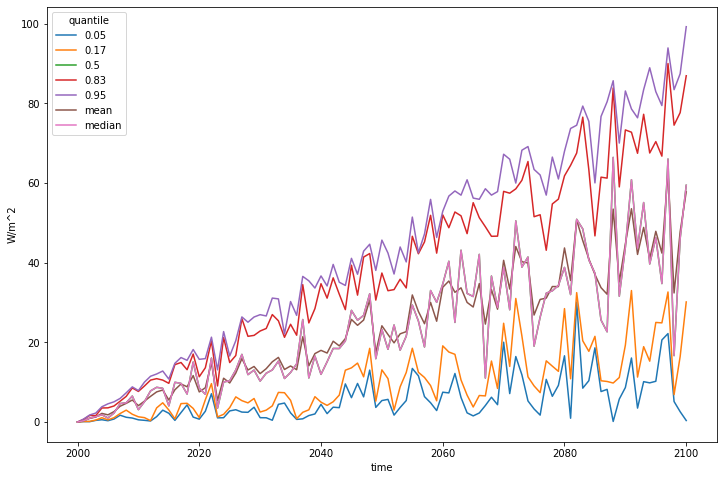

In [17]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(
    hue="quantile"
)